# Linear Regression with Pytorch

Linear Regression is the task of predicting the value of a variable (y) depending on another variable (x) by fitting a linear curve using a set of existing datapoints (X, Y). 

The goal is to come up with the equation $y = Wx + b$ that "fits" the datapoints (X, Y) the "best". $W, b$ are the parameters of this equation that we need to "learn"

$x$ is also called input features and it can be of arbitrary dimension. Typically, the $y$ for an $x$ is a single value

### Linear Least Squares (https://en.wikipedia.org/wiki/Linear_least_squares)

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Create dummy data

In [2]:
# create the synthetic input as 20 datapoints with feature length = 1
# this is so that we can visualize the datpoints easier

X = np.array(list(range(0, 100, 5))).reshape((-1,1))

In [3]:
input_shape = X.shape
N = X.shape[0]
m = X.shape[1]

print("Shape of the input:", input_shape)
print("Number of samples (N):", N)
print("Feature length (m):", m)

Shape of the input: (20, 1)
Number of samples (N): 20
Feature length (m): 1


In [4]:
# create the synthetic set of labels by adding noise to a straight line

def foo(x, m=2, c=10, mu=20, sigma=15):
    num_x = np.array(x)
    return m*num_x + c + np.random.normal(mu, sigma, num_x.shape)

y = np.array([foo(x) for x in X])

Text(0, 0.5, 'y')

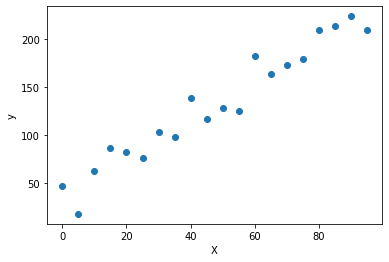

In [5]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

# Fit a line to the data

Now the goal is to "fit" the datapoints with a straight line that could be used to predict the "y" value of new samples. The way we achieve this task is by finding the line which minimizes the Mean Squared Error (MSE) loss for the datapoints

Note that this has a closed form solution, which can be used when you have a small number of coefficients. Since we are working with potentially many coefficients, we optimize with gradient descent.

In [45]:
class LinearRegressor(torch.nn.Module):
    def __init__(self, feature_len):
        super(LinearRegressor, self).__init__()
        # This will hold the parameters of the model: W (Weights) and b (bias or intercept)
        self.linear = torch.nn.Linear(feature_len, 1)
        self.linear.weight.data *= 0
    def forward(self, x):
        return self.linear(x)

In [7]:
def train(X, y, learning_rate=0.01, batch_size=10, n_iters=10):
    """
    Train a linear regressor using the provided X, y dataset.
    The steps involved in training are as follows:
        1. Instantiate a regressor model using the input's feature len
        2. Instantiate an SGD optimizer for the parameters of the regressor using the learning_rate
        3. Do training for n_iters number of times
        4. Split dataset into batches of size `batch_size`
        5. Refresh the gradients of the regressor
        6. Run the forward function of regressor to get the prediction of the input batch
        7. Calculate the MSE Loss
        8. Run backpropogation to calculate the gradients
        9. Update the parameters with the gradients
    """
    input_shape = X.shape
    N = X.shape[0]
    m = X.shape[1]
    
    # 1. Instantiate a regressor model using the input's feature len
    regressor = LinearRegressor(m)
    
    def plot_curves():
        plt.scatter(X, y)
        plt.plot(X, predict(regressor, X), color='red')
    
    plot_curves()
    
    # 2. Instantiate an SGD optimizer for the parameters of the regressor using the learning_rate
    optimizer = torch.optim.SGD(regressor.parameters(), lr=learning_rate)
    
    # 3. Do this for n_iters number of times
    for iter_ in range(n_iters):
        iteration_loss = 0.
        # 4. Split dataset into batches of size `batch_size`
        for i in range(0, N, batch_size):
            # PyTorch requires the input and output to be tensors
            x_batch = torch.FloatTensor(X[i:i+batch_size])
            y_batch = torch.FloatTensor(y[i:i+batch_size])
            
            # 5. Refresh the gradients of the regressor
            optimizer.zero_grad()
            
            # 6. Run the forward function of regressor to get the prediction of the input batch
            # Note: Don't use the predict funtion here as the predict function ignores gradients
            y_pred = regressor(x_batch)
            
            # 7. Calculate the MSE Loss
            loss = torch.mean((y_pred - y_batch)**2)
            
            # 8. Run backpropogation to calculate the gradients
            loss.backward()
            
            # 9. Update the Weights (W) with the gradients (Delta) as W = W + (lr * Delta)
            optimizer.step()
            
            # store the accumulated loss for the iteration
            iteration_loss += loss.detach().numpy()
            
        print("Epoch", iter_, "Loss:", iteration_loss)
        plot_curves()
    plt.xlabel('X')
    plt.ylabel('y')
    return regressor
            
def predict(regressor, x):
    with torch.no_grad():  # don't need gradients during prediction
        return regressor(torch.FloatTensor(x))
    

Epoch 0 Loss: 30513.56396484375
Epoch 1 Loss: 1406.2118530273438
Epoch 2 Loss: 1256.6034393310547
Epoch 3 Loss: 1252.7325439453125
Epoch 4 Loss: 1252.735595703125
Epoch 5 Loss: 1252.5280456542969
Epoch 6 Loss: 1252.3380737304688
Epoch 7 Loss: 1252.1471252441406
Epoch 8 Loss: 1251.9557495117188
Epoch 9 Loss: 1251.7649536132812


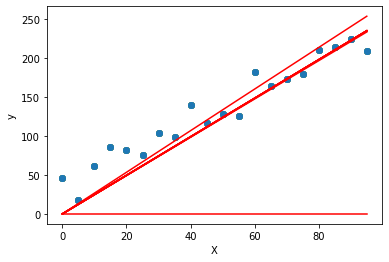

In [8]:
trained_regressor = train(X, y, learning_rate=0.0001)

The blue dots represent the datapoints in the training set. The red lines represent the fitted curve by the regressor after each epoch. The loss gradually reduces after each iteration and the regressor's line steadily comes closer in representing the datapoints during the training process.

In [9]:
#  DON'T EDIT THIS!!

def compare(x, regressor):
#     print('true y:', foo(x))
#     print('predicted y:', predict(regressor, x).detach().numpy())
    return foo(x), predict(regressor, x).detach().numpy()

We can use the trained regressor for predicing the "y" value for "unseen" X

In [10]:
#  DON'T EDIT THIS!!

unseen_x = np.array([[260], [300]])
true_y, pred_y = compare(unseen_x, trained_regressor)

print("predictions:", pred_y)

assert pred_y[0] < 650 and pred_y[0] > 600
assert pred_y[1] < 750 and pred_y[1] > 700

print('All Tests Ran Successfully!')

predictions: [[642.52875]
 [741.354  ]]
All Tests Ran Successfully!
